## Black Litterman Model

### Considering ishares 1-3 Year Treasury Bond ETF's 1Y growth rate (2023) as Risk-free rate 

In [1]:
# Past year's returns for each ETF (2023)
etf_symbols = ['BNO', 'BOTZ', 'CORN', 'GLD', 'HACK', 'IHI', 'KBE', 'KIE', 'KRE', 'PALL', 'PJP', 'PPLT', 'QQQ', 'SKYY', 'SLV', 'SMH', 'SOYB', 'SPY', 'UNG', 'USO', 'WEAT', 'XBI', 'XLF', 'XLV']
etf_returns = [8.68, 28.48, -17.96, 9.53, 35.52, -1.70, -1.19, 9.51, -13.95, -40.55,-3.51, -10.41, 49.89, 44.64, -3.79, 60.75, -4.28, 22.16, -58.88, 6.05, -23.71, 5.96, 0.85, 2.01]
print(len(etf_symbols), len(etf_returns))
# Risk-free rate
risk_free_rate_past_year = 0.079  # 0.79% 

# Calculate expected excess return for each ETF
expected_excess_returns = [etf_return - risk_free_rate_past_year for etf_return in etf_returns]

# Convert values to the required format
views = {etf: expected_excess_return / 100 for etf, expected_excess_return in zip(etf_symbols, expected_excess_returns)}

# Print the views in the required format
print("views = {")
for etf, expected_excess_return in views.items():
    print(f"    '{etf}': {expected_excess_return:.5f},")
print("}")

24 24
views = {
    'BNO': 0.08601,
    'BOTZ': 0.28401,
    'CORN': -0.18039,
    'GLD': 0.09451,
    'HACK': 0.35441,
    'IHI': -0.01779,
    'KBE': -0.01269,
    'KIE': 0.09431,
    'KRE': -0.14029,
    'PALL': -0.40629,
    'PJP': -0.03589,
    'PPLT': -0.10489,
    'QQQ': 0.49811,
    'SKYY': 0.44561,
    'SLV': -0.03869,
    'SMH': 0.60671,
    'SOYB': -0.04359,
    'SPY': 0.22081,
    'UNG': -0.58959,
    'USO': 0.05971,
    'WEAT': -0.23789,
    'XBI': 0.05881,
    'XLF': 0.00771,
    'XLV': 0.01931,
}


#### Black Litterman Model Code


Optimal Weights:
OrderedDict([('BNO', 0.0480180403742382), ('BOTZ', 0.0), ('CORN', 0.0), ('GLD', 0.0), ('HACK', 0.0), ('IHI', 0.0), ('KBE', 0.0), ('KIE', 0.0), ('KRE', 0.0), ('PALL', 0.0), ('PJP', 0.0), ('PPLT', 0.0), ('QQQ', 0.3080722311247176), ('SKYY', 0.0), ('SLV', 0.0), ('SMH', 0.6439097285010441), ('SOYB', 0.0), ('SPY', 0.0), ('UNG', 0.0), ('USO', 0.0), ('WEAT', 0.0), ('XBI', 0.0), ('XLF', 0.0), ('XLV', 0.0)])


C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


<Axes: xlabel='Volatility', ylabel='Return'>

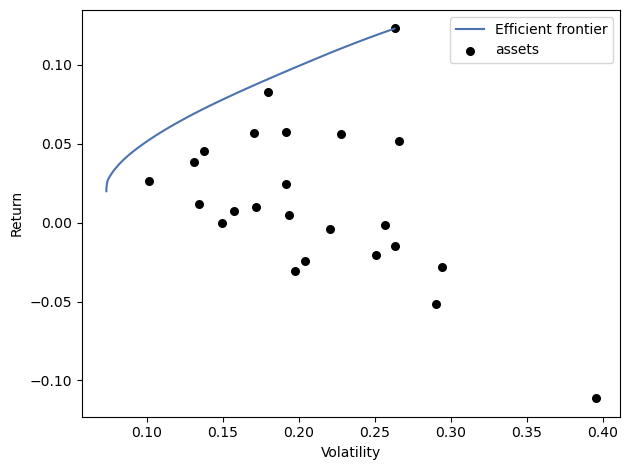

In [2]:
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, BlackLittermanModel, EfficientFrontier, plotting
import pandas as pd
import numpy as np

# Load data
df = pd.read_excel('Model_Training_Data/etf_ei_merged_data.xlsx')

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Separate data for testing (2023) and historical data (2018-2022)
testing_data = df[df['Date'].between('2023-01-01', '2023-06-30')]
df = df[df['Date'].between('2018-01-01', '2022-12-31')]

# Convert data to prices format for pypfopt
prices_all = df.pivot_table(index='Date', columns='Ticker', values='Close', aggfunc='mean')

# Calculate expected returns and sample covariance for the entire data
mean_returns_all = expected_returns.mean_historical_return(prices_all).to_frame()
cov_matrix_all = risk_models.sample_cov(prices_all)

# Convert cov_matrix_all to DataFrame if it's not already
if isinstance(cov_matrix_all, pd.Series):
    cov_matrix_all = pd.DataFrame(cov_matrix_all)
elif isinstance(cov_matrix_all, np.ndarray):
    cov_matrix_all = pd.DataFrame(cov_matrix_all, columns=prices_all.columns, index=prices_all.columns)

# Specify your views on individual assets
views = {
    'BNO': 0.08601,
    'BOTZ': 0.28401,
    'CORN': -0.18039,
    'GLD': 0.09451,
    'HACK': 0.35441,
    'IHI': -0.01779,
    'KBE': -0.01269,
    'KIE': 0.09431,
    'KRE': -0.14029,
    'PALL': -0.40629,
    'PJP': -0.03589,
    'PPLT': -0.10489,
    'QQQ': 0.49811,
    'SKYY': 0.44561,
    'SLV': -0.03869,
    'SMH': 0.60671,
    'SOYB': -0.04359,
    'SPY': 0.22081,
    'UNG': -0.58959,
    'USO': 0.05971,
    'WEAT': -0.23789,
    'XBI': 0.05881,
    'XLF': 0.00771,
    'XLV': 0.01931,
}

views_df = pd.DataFrame(views, index=['views'])

# Normalize the individual views so they sum up to 1
sum_views = sum(abs(view) for view in views_df.loc['views'])
normalized_views = {ticker: view / sum_views for ticker, view in zip(views_df.columns, views_df.loc['views'])}

# Specify the uncertainty of your views
# omega = np.diag([0] * len(views_df))
omega = np.diag([0.005] * len(views_df))

# Convert views into Q and P matrices for Black-Litterman model
Q = pd.Series(normalized_views)
P = pd.DataFrame(0, index=Q.index, columns=prices_all.columns)
for ticker in Q.index:
    P.loc[ticker, ticker] = 1

# Black-Litterman model setup for the entire data
bl_all = BlackLittermanModel(cov_matrix_all, pi=mean_returns_all, absolute_views=Q, P=P)

# Get the Posterior Expected Returns and Posterior Covariance Matrix
bl_return_all = bl_all.bl_returns()
bl_cov_matrix_all = bl_all.bl_cov()

# Optimize the portfolio using the Efficient Frontier
ef = EfficientFrontier(bl_return_all, bl_cov_matrix_all)
weights = ef.max_sharpe()

# Print the resulting weights
print("\nOptimal Weights:")
print(weights)

# Create a new instance for the modified problem
ef_modified = EfficientFrontier(bl_return_all, bl_cov_matrix_all)

# Plot the efficient frontier
from pypfopt import plotting
plotting.plot_efficient_frontier(ef_modified, show_assets=True)

The `plot_efficient_frontier` function in the context of the Black-Litterman model typically visualizes the efficient frontier of a portfolio. Let me break down what the efficient frontier represents and how this plot helps in understanding it:

1. **Efficient Frontier:**
   - The efficient frontier is a concept in modern portfolio theory that represents a set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return.
   - Portfolios along the efficient frontier are considered efficient because they maximize returns for a given level of risk or minimize risk for a given level of returns.

2. **Mean-Variance Optimization:**
   - The Black-Litterman model, like other portfolio optimization techniques, aims to find the optimal allocation of assets in a portfolio based on the trade-off between risk and return.
   - The efficient frontier plot displays various portfolios with different asset allocations and their corresponding risk (volatility) and expected return.

3. **Components of the Plot:**
   - **Efficient Frontier Line:** The curve on the plot represents the efficient frontier, showing the risk-return trade-off for different portfolios.
   - **Dots/Markers:** Each dot or marker on the plot represents a specific portfolio along the efficient frontier. These portfolios are optimized based on the input parameters and constraints provided.

4. **Interpretation:**
   - Portfolios that lie on the upper-left section of the efficient frontier are considered more desirable as they offer higher returns for the same level of risk or lower risk for the same level of returns.
   - Portfolios on the lower-right side are less desirable as they provide lower returns for the same level of risk or higher risk for the same level of returns.

5. **Show Assets Parameter:**
   - The `show_assets` parameter in the `plot_efficient_frontier` function allows you to display individual assets on the plot along with the efficient frontier. This can be useful to visualize the specific assets contributing to optimal portfolios.

In summary, the `plot_efficient_frontier` function helps you visually assess the risk and return characteristics of different portfolios along the efficient frontier, assisting in making informed investment decisions based on your risk tolerance and return objectives.

 - Different Plots can be Plotted related to Black Litterman Model, and the Efficient Frontier of the Portfoilio

In [9]:
# Calculate the expected portfolio return and volatility
portfolio_return_bl = bl_return_all.values.flatten() @ np.array(list(weights.values()))
portfolio_volatility_bl = np.sqrt(np.array(list(weights.values())).T @ bl_cov_matrix_all.values @ np.array(list(weights.values())))

# Calculate the Sharpe ratio
risk_free_rate = 0.079  # Replace with the actual risk-free rate
sharpe_ratio_bl = (portfolio_return_bl - risk_free_rate) / portfolio_volatility_bl

# Display additional metrics
print("\nBlack-Litterman Model - Performance Metrics:")
print("Expected Portfolio Return:", portfolio_return_bl)
print("Expected Portfolio Volatility:", portfolio_volatility_bl)
print("Sharpe Ratio:", sharpe_ratio_bl)


Black-Litterman Model - Performance Metrics:
Expected Portfolio Return: 0.10713039625172417
Expected Portfolio Volatility: 0.21956683416401598
Sharpe Ratio: 0.1281176929968887


## Bayesian Hierarchical Model 

### Calculating Mean Returns from the Observed (Historical) Data

In [10]:
import pandas as pd
import numpy as np
import warnings

def _check_returns(returns):
    # Check NaNs excluding leading NaNs
    if np.any(np.isnan(returns.mask(returns.ffill().isnull(), 0))):
        warnings.warn(
            "Some returns are NaN. Please check your price data.", UserWarning
        )
    if np.any(np.isinf(returns)):
        warnings.warn(
            "Some returns are infinite. Please check your price data.", UserWarning
        )

def custom_mean_historical_return(returns, compounding=True, frequency=252):
    """
    Calculate annualized mean (daily) historical return from input (daily) asset returns.

    :param returns: percentage returns of the assets, each row is a date, and each column is a ticker/id.
    :type returns: pd.DataFrame
    :param compounding: computes geometric mean returns if True, arithmetic otherwise, optional.
    :type compounding: bool, defaults to True
    :param frequency: number of time periods in a year, defaults to 252 (the number of trading days in a year)
    :type frequency: int, optional
    :return: annualized mean (daily) return for each asset
    :rtype: pd.Series
    """
    _check_returns(returns)
    
    # Convert percentage returns to decimals
    returns = returns / 100
    
    # Replace NaN values with 0 for compounding
    returns = returns.fillna(0)
    
    # Print NaN and Inf values separately for investigation
    nan_values = returns[returns.isna()].index.tolist()
    inf_values = returns[np.isinf(returns)].index.tolist()
    
    if nan_values:
        print(f"Nan Values: {nan_values}")

    if inf_values:
        print(f"Inf Values: {inf_values}")
    
    # Select data from the start of 2018 to the end of 2022
    returns = returns.loc['2018-01-01':'2022-12-31']
    
    # Calculate the annualized mean return for each ticker
    if compounding:
        product = (1 + returns).prod()
        geometric_mean = product ** (frequency / returns.count()) - 1
        return geometric_mean
    else:
        return returns.mean() * frequency

# Load data
df = pd.read_excel(r'ETF_Data\data\pivot_table_2018_2023.xlsx')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate annualized mean (daily) return for each ticker
mean_returns = df.apply(custom_mean_historical_return, axis=0)

# Display or use mean_returns as needed
print(mean_returns)

BNO     0.093430
BOTZ   -0.028142
CORN    0.099445
GLD     0.065341
HACK    0.068476
IHI     0.127079
KBE    -0.009436
KIE     0.059359
KRE    -0.000374
PALL    0.102179
PJP     0.041435
PPLT    0.023343
QQQ     0.113303
SKYY    0.046624
SLV     0.066144
SMH     0.157303
SOYB    0.097811
SPY     0.074678
UNG    -0.095802
USO    -0.061125
WEAT    0.058742
XBI    -0.004450
XLF     0.041519
XLV     0.104501
dtype: float64


### Calculating Other Metrics like Skewness and Standard Deviation

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

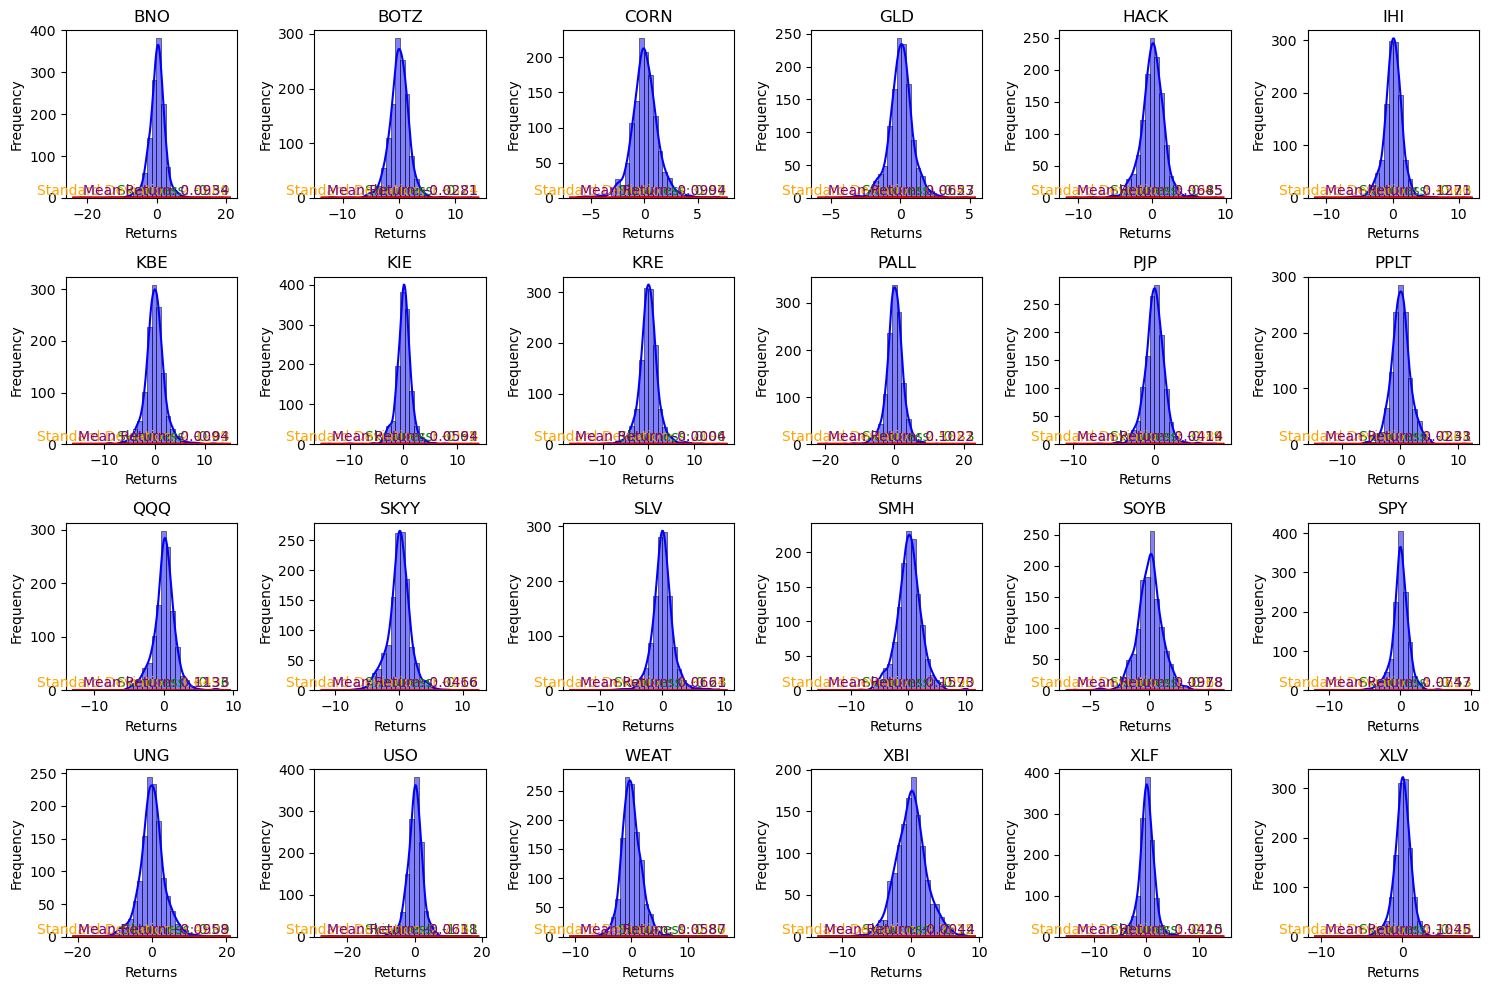

Skewness Values:
{'BNO': -0.5882107373132246, 'BOTZ': -0.21171319525450105, 'CORN': 0.06545365482544135, 'GLD': -0.27157827526347167, 'HACK': -0.4490490422215457, 'IHI': -0.2261234895837062, 'KBE': -0.028032239639364426, 'KIE': -0.6121392332780793, 'KRE': 0.0590233917699835, 'PALL': -0.32771839977967243, 'PJP': -0.19157912975607852, 'PPLT': -0.4134168735791693, 'QQQ': -0.35736276542271866, 'SKYY': -0.16350249369956624, 'SLV': -0.2347926051149806, 'SMH': -0.19903357281234654, 'SOYB': -0.1808354580955719, 'SPY': -0.526340852120396, 'UNG': 0.08876939749754176, 'USO': -1.3844680117316184, 'WEAT': 0.7965983099767328, 'XBI': -0.12048253583769578, 'XLF': -0.2021596650044731, 'XLV': -0.25709528946044563}

Standard Deviation Values:
{'BNO': 2.587979274813258, 'BOTZ': 1.8373520542025212, 'CORN': 1.3250410224458307, 'GLD': 0.9042729338392073, 'HACK': 1.5965015570554277, 'IHI': 1.4559822223834364, 'KBE': 2.124862751602079, 'KIE': 1.6078148314342506, 'KRE': 2.2194148153221227, 'PALL': 2.53811026467

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, skew

# Assuming prices_all is your DataFrame with tickers as columns and returns as values
# For example:
# Get the list of tickers
tickers = df.columns

# Create a dictionary to store skewness and standard deviation values
skewness_dict = {}
std_dev_dict = {}

# Filter data from 2018 to 2022
df_filtered = df.loc['2018-01-01':'2022-12-31']

# Plot individual histograms for each ticker
plt.figure(figsize=(15, 10))

for ticker in tickers:
    plt.subplot(4, 6, tickers.get_loc(ticker) + 1)  # Adjust the subplot layout as needed
    sns.histplot(df_filtered[ticker].dropna(), bins=30, kde=True, color='blue')
    
    plt.title(ticker)
    plt.xlabel('Returns')
    plt.ylabel('Frequency')

    # Fit normal distribution
    mu, std = norm.fit(df_filtered[ticker].dropna())
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Fit')

    # Fit Student's t distribution
    df_fit, loc, scale = t.fit(df_filtered[ticker].dropna())
    p = t.pdf(x, df_fit, loc, scale)
    plt.plot(x, p, 'r', linewidth=2, label='Student\'s t Fit')

    # Display skewness and standard deviation
    skewness = skew(df_filtered[ticker].dropna())
    skewness_dict[ticker] = skewness
    std_dev_dict[ticker] = std
    plt.text(xmax, 0.2, f'Skewness: {skewness:.2f}', verticalalignment='bottom', horizontalalignment='right', color='green', fontsize=10)
    plt.text(xmax, 0.15, f'Standard Deviation: {std:.4f}', verticalalignment='bottom', horizontalalignment='right', color='orange', fontsize=10)

    # Display mean returns
    mean_return = mean_returns[ticker]
    plt.text(xmax, 0.1, f'Mean Return: {mean_return:.4f}', verticalalignment='bottom', horizontalalignment='right', color='purple', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Display the skewness and standard deviation values as dictionaries
print("Skewness Values:")
print(skewness_dict)

print("\nStandard Deviation Values:")
print(std_dev_dict)

### Bayesian Hierarchical Model Script

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, alpha, sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 773 seconds.
There were 111 divergences after tuning. Increase `target_accept` or reparameterize.
C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (72) in plot_posterior, generating only 40 plots
  warnings.warn(



Bayesian Hierarchical Model - Optimized Weights:
[1.76882393e-10 1.02451353e-10 1.40517652e-10 9.61420819e-11
 1.01792770e-10 1.36716714e-09 1.00337822e-10 9.68261175e-11
 9.83233038e-11 1.91246821e-10 9.05244136e-11 9.18832328e-11
 4.48228509e-10 9.04532620e-11 9.68596574e-11 9.99999996e-01
 1.60188203e-10 1.09967767e-10 1.06075453e-10 1.04067991e-10
 9.06647965e-11 9.86541238e-11 9.06299631e-11 1.98616970e-10]


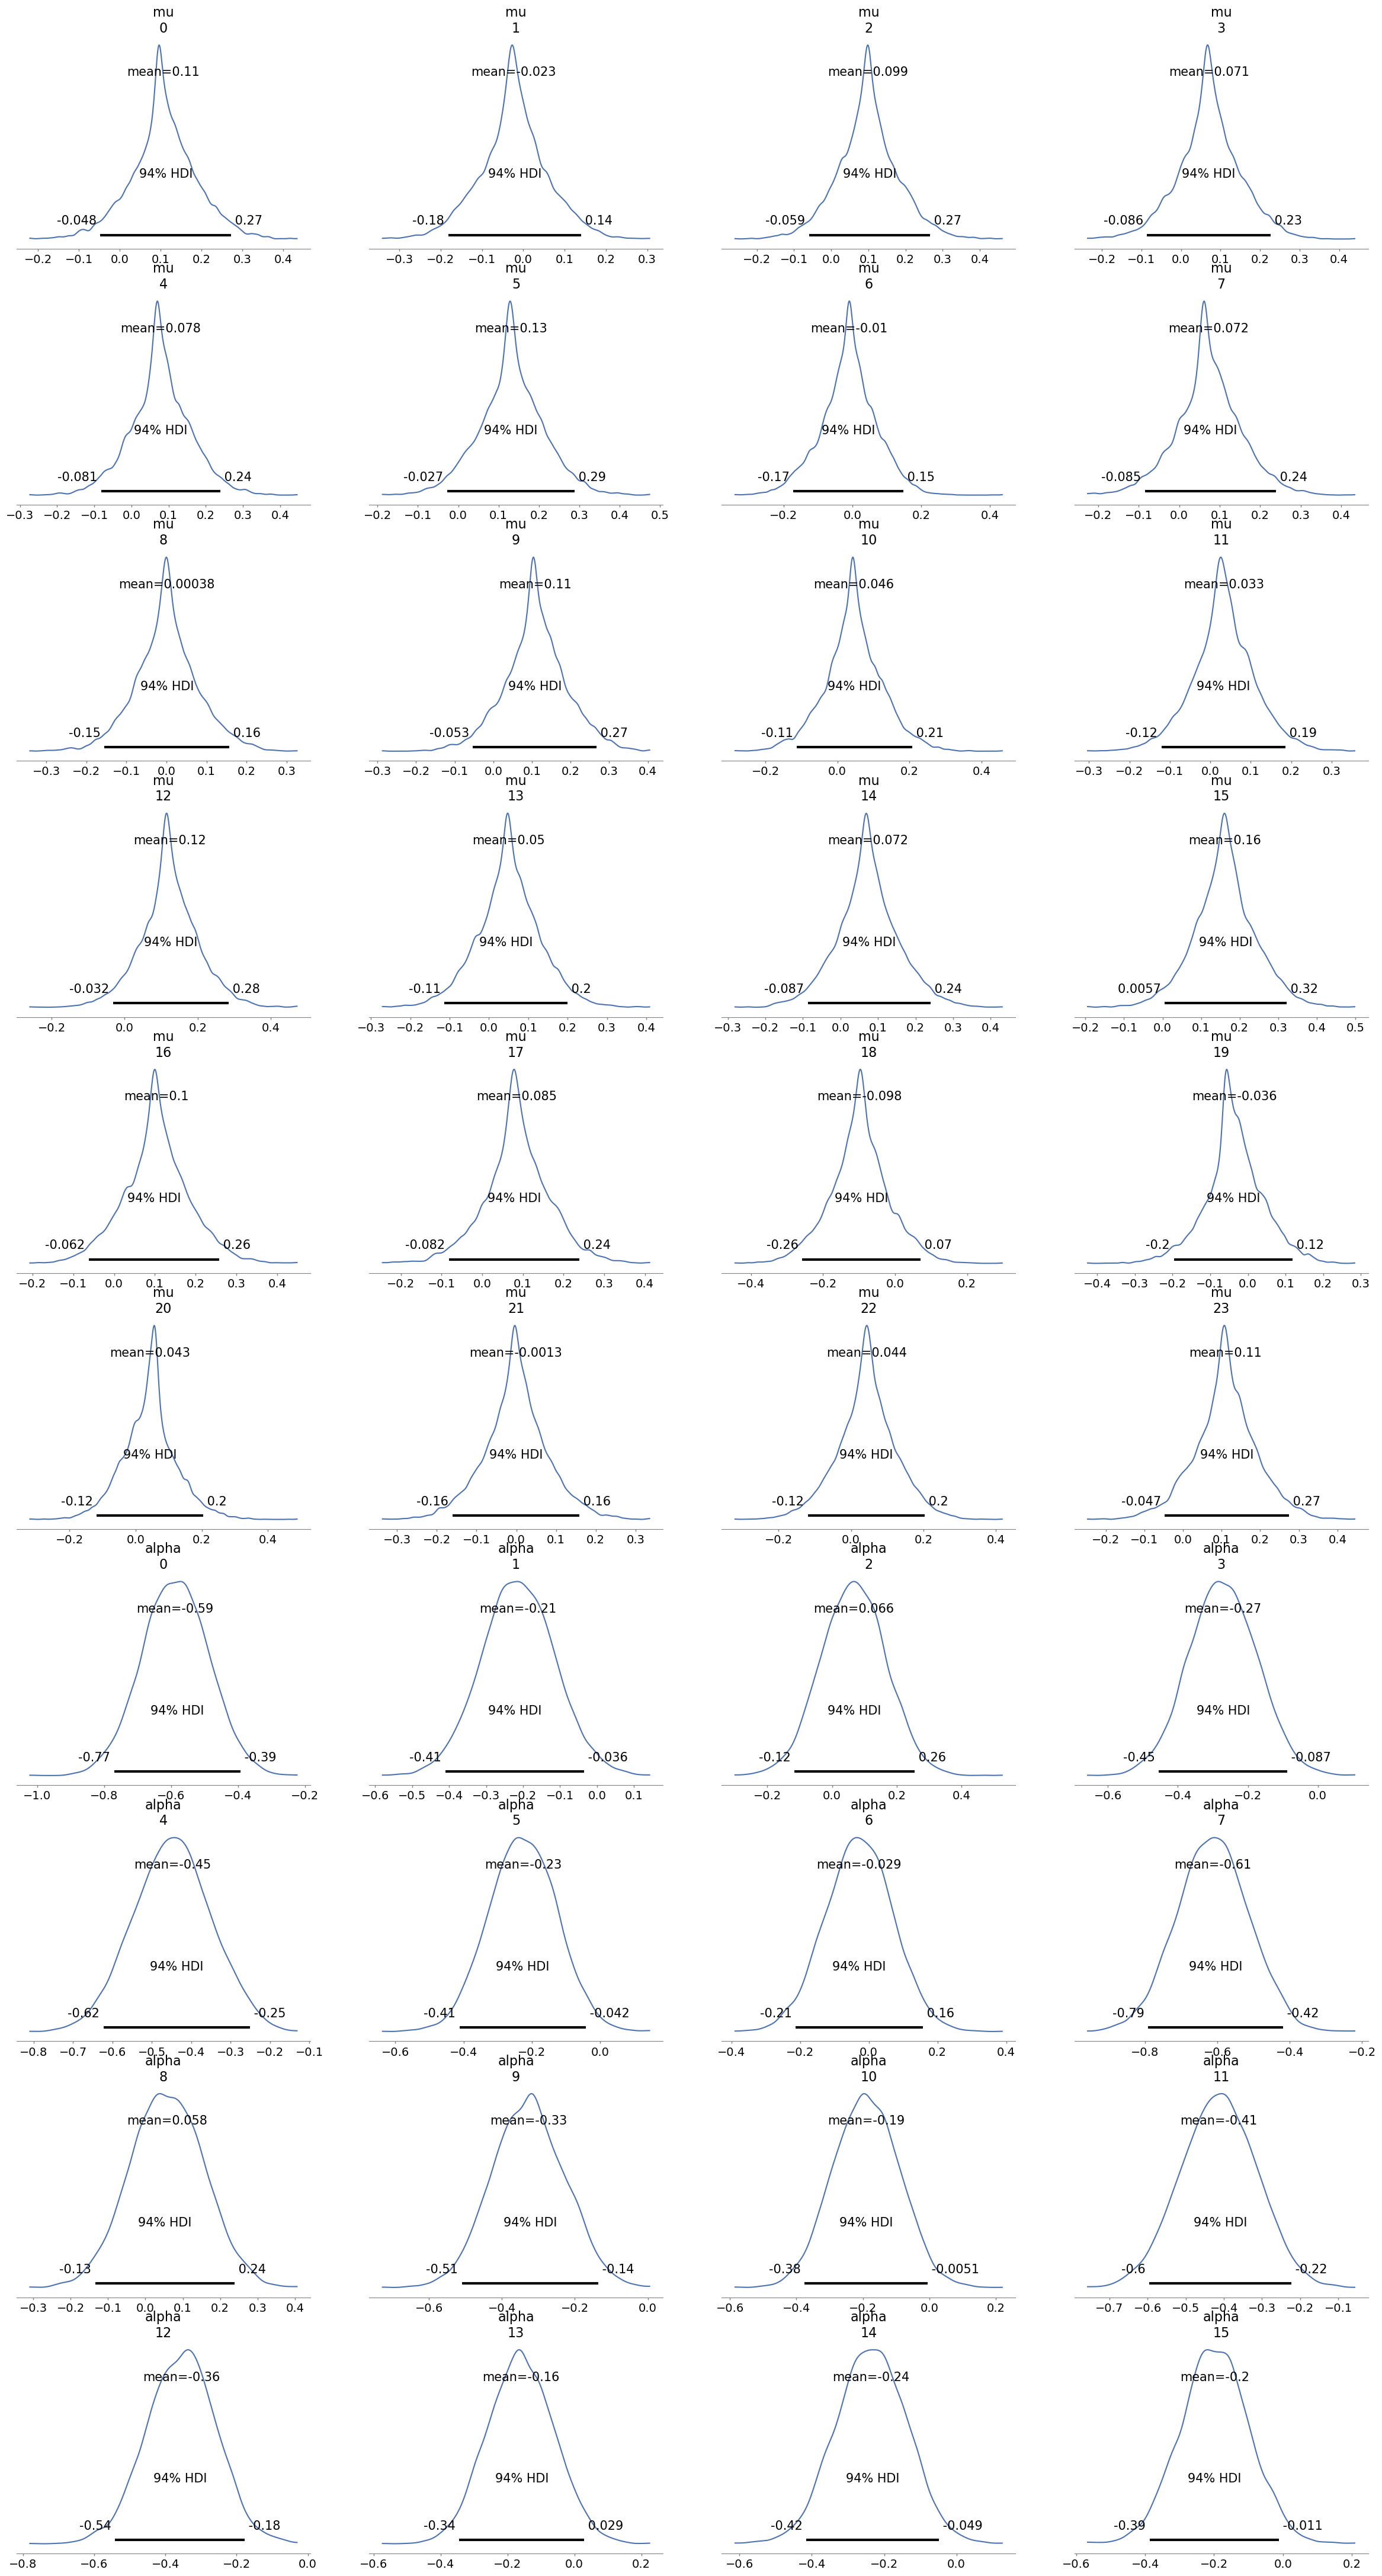

In [15]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import cvxpy as cp

# Assuming you have the mean returns, skewness, and standard deviation values for the years 2018 to 2022
mean_returns_observed = [0.093430, -0.028142, 0.099445, 0.065341, 0.068476, 0.127079, -0.009436,
                         0.059359, -0.000374, 0.102179, 0.041435, 0.023343, 0.113303, 0.046624,
                         0.066144, 0.157303, 0.097811, 0.074678, -0.095802, -0.061125, 0.058742,
                         -0.004450, 0.041519, 0.104501] # your observed mean returns
skewness_values_observed = [-0.5882107373132246, -0.21171319525450105, 0.06545365482544135, -0.27157827526347167, -0.4490490422215457, -0.2261234895837062, -0.028032239639364426, -0.6121392332780793, 0.0590233917699835,
                           -0.32771839977967243, -0.19157912975607852, -0.4134168735791693, -0.35736276542271866, -0.16350249369956624, -0.2347926051149806, -0.19903357281234654, -0.1808354580955719, -0.526340852120396,
                           0.08876939749754176, -1.3844680117316184, 0.7965983099767328, -0.12048253583769578, -0.2021596650044731, -0.25709528946044563]  # your observed skewness values
standard_deviation_values_observed = [2.587979274813258, 1.8373520542025212, 1.3250410224458307, 0.9042729338392073, 1.5965015570554277,
                                      1.4559822223834364, 2.124862751602079, 1.6078148314342506, 2.2194148153221227, 2.538110264673124,
                                      1.3087524889234536, 1.7807549705036094, 1.6492695787460352, 1.8816771773945704, 1.813353547076289,
                                      2.209012700680778, 1.136829782494156, 1.3613077500459638, 3.469148496632123, 2.7761017056491,
                                      1.8858993242674735, 2.2675018582697035, 1.7015274795432975, 1.2338262099057264]  # your observed standard deviation values

# Number of assets
n_assets = len(mean_returns_observed)

# Create a Bayesian model
with pm.Model() as bayesian_model:
    # Prior for mean returns
    mu = pm.Normal('mu', mu=mean_returns_observed, tau=1 / (0.1**2), shape=n_assets)

    # Prior for skewness using SkewNormal distribution
    alpha = pm.Normal('alpha', mu=skewness_values_observed, tau=1 / (0.1**2), shape=n_assets)

    # Prior for standard deviation
    sigma = pm.HalfCauchy('sigma', beta=1, shape=n_assets)

    # Likelihood term for observed data
    returns = pm.SkewNormal('returns', mu=mu, sigma=sigma, alpha=alpha, observed=mean_returns_observed)

    # Sample from the posterior
    trace = pm.sample(2000, tune=2000, target_accept=0.99)

# Extracting results
posterior_mean_returns = trace.posterior['mu'].mean(dim=['chain', 'draw']).values
# posterior_cov_matrix = np.cov(trace.posterior['mu'].T)
# Assuming trace.posterior['mu'] is a multi-dimensional array
mu_posterior = trace.posterior['mu'].values.reshape(-1, trace.posterior['mu'].shape[-1])
# Calculate the covariance matrix
posterior_cov_matrix = np.cov(mu_posterior.T)

# Use ArviZ to analyze and visualize the posterior
az.plot_posterior(trace)
az.summary(trace)

weights = cp.Variable(n_assets)
objective = cp.Maximize(posterior_mean_returns @ weights)
constraints = [cp.sum(weights) == 1, weights >= 0, weights <= 1]

problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS)

weights_bayesian_optimized = weights.value
print("\nBayesian Hierarchical Model - Optimized Weights:")
print(weights_bayesian_optimized)

In [16]:
optimized_weights = [1.76882393e-10, 1.02451353e-10, 1.40517652e-10, 9.61420819e-11,
 1.01792770e-10, 1.36716714e-09, 1.00337822e-10, 9.68261175e-11,
 9.83233038e-11, 1.91246821e-10, 9.05244136e-11, 9.18832328e-11,
 4.48228509e-10, 9.04532620e-11, 9.68596574e-11, 9.99999996e-01,
 1.60188203e-10, 1.09967767e-10, 1.06075453e-10, 1.04067991e-10,
 9.06647965e-11, 9.86541238e-11, 9.06299631e-11, 1.98616970e-10]

tickers = ['BNO', 'BOTZ', 'CORN', 'GLD', 'HACK', 'IHI', 'KBE', 'KIE', 'KRE', 'PALL', 'PJP', 'PPLT',
           'QQQ', 'SKYY', 'SLV', 'SMH', 'SOYB', 'SPY', 'UNG', 'USO', 'WEAT', 'XBI', 'XLF', 'XLV']

# Zip tickers and weights together
ticker_weight_pairs = zip(tickers, optimized_weights)

# Print the pairs with formatted weights
for ticker, weight in ticker_weight_pairs:
    print(f'{ticker}: {weight:.15f}')

BNO: 0.000000000176882
BOTZ: 0.000000000102451
CORN: 0.000000000140518
GLD: 0.000000000096142
HACK: 0.000000000101793
IHI: 0.000000001367167
KBE: 0.000000000100338
KIE: 0.000000000096826
KRE: 0.000000000098323
PALL: 0.000000000191247
PJP: 0.000000000090524
PPLT: 0.000000000091883
QQQ: 0.000000000448229
SKYY: 0.000000000090453
SLV: 0.000000000096860
SMH: 0.999999996000000
SOYB: 0.000000000160188
SPY: 0.000000000109968
UNG: 0.000000000106075
USO: 0.000000000104068
WEAT: 0.000000000090665
XBI: 0.000000000098654
XLF: 0.000000000090630
XLV: 0.000000000198617


In [17]:
# Calculate the expected portfolio return and volatility
portfolio_return_bayesian = posterior_mean_returns @ weights_bayesian_optimized
portfolio_volatility_bayesian = np.sqrt(weights_bayesian_optimized.T @ posterior_cov_matrix @ weights_bayesian_optimized)

# Calculate the Sharpe ratio
risk_free_rate = 0.078  # Replace with the actual risk-free rate
sharpe_ratio_bayesian = (portfolio_return_bayesian - risk_free_rate) / portfolio_volatility_bayesian

# Display additional metrics
print("\nBayesian Hierarchical Model - Performance Metrics:")
print("Expected Portfolio Return:", portfolio_return_bayesian)
print("Expected Portfolio Volatility:", portfolio_volatility_bayesian)
print("Sharpe Ratio:", sharpe_ratio_bayesian)


Bayesian Hierarchical Model - Performance Metrics:
Expected Portfolio Return: 0.1610655469307895
Expected Portfolio Volatility: 0.08092926278036369
Sharpe Ratio: 1.0263969308138088


In [39]:
print(pm.model_to_graphviz(bayesian_model))
# print(trace)
# print(trace.sample_stats)
# print(trace.observed_data)
# print(trace.posterior)


# print(trace.varnames) If not working, below
# Assuming 'trace' is your PyMC trace
# summary = az.summary(trace)
# Print the variable names
# print(summary.index.to_list())

digraph {
	subgraph cluster24 {
		alpha [label="alpha
~
Normal" shape=ellipse]
		returns [label="returns
~
SkewNormal" shape=ellipse style=filled]
		mu [label="mu
~
Normal" shape=ellipse]
		sigma [label="sigma
~
HalfCauchy" shape=ellipse]
		label=24 labeljust=r labelloc=b style=rounded
	}
	alpha -> returns
	sigma -> returns
	mu -> returns
}


In [ ]:
# Assuming 'bayesian_model' is your PyMC model
graph = pm.model_to_graphviz(bayesian_model)
graph.render(filename='bayesian_model', format='png', cleanup=True)
graph.view()

Gelman-Rubin Statistic:
<xarray.Dataset>
Dimensions:      (mu_dim_0: 24, alpha_dim_0: 24, sigma_dim_0: 24)
Coordinates:
  * mu_dim_0     (mu_dim_0) int32 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
  * alpha_dim_0  (alpha_dim_0) int32 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22 23
  * sigma_dim_0  (sigma_dim_0) int32 0 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22 23
Data variables:
    mu           (mu_dim_0) float64 1.002 1.002 1.0 1.002 ... 1.0 1.001 1.0
    alpha        (alpha_dim_0) float64 1.001 1.001 1.001 1.002 ... 1.0 1.0 1.001
    sigma        (sigma_dim_0) float64 1.001 1.001 1.0 1.0 ... 1.0 0.9999 1.0


C:\Users\saide\anaconda3\envs\pymc_env\Lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (288) in plot_autocorr, generating only 40 plots
  warnings.warn(


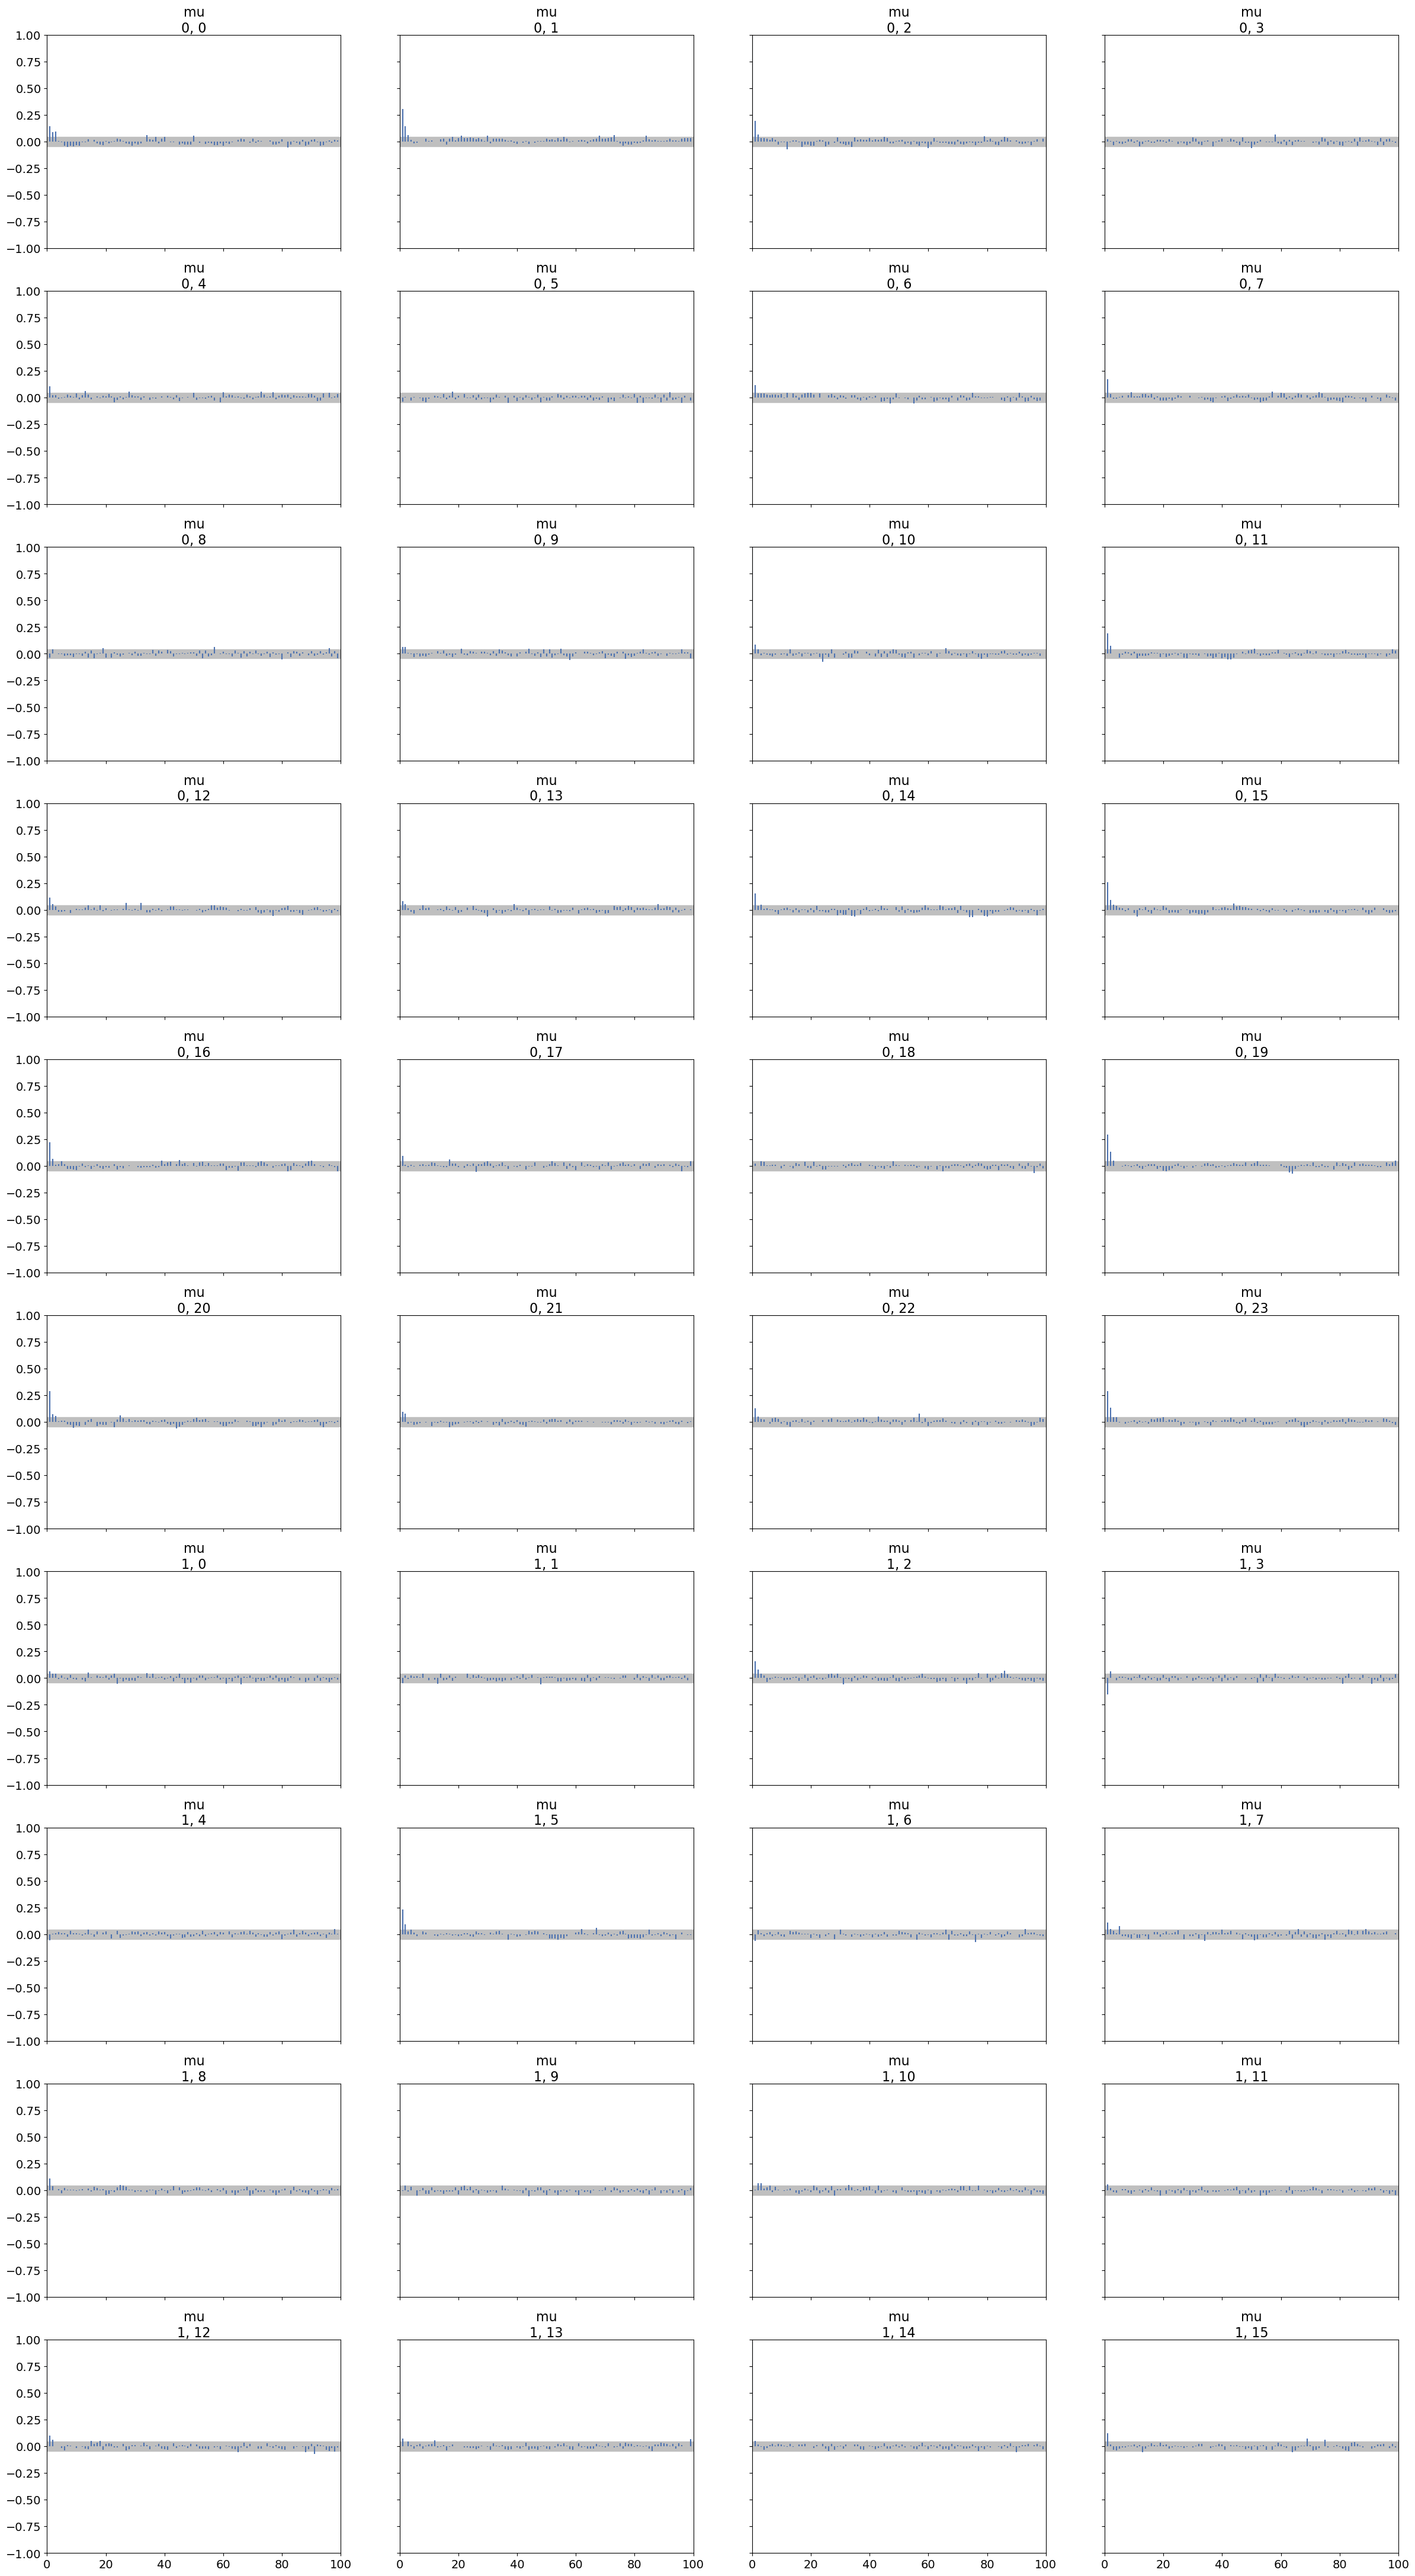

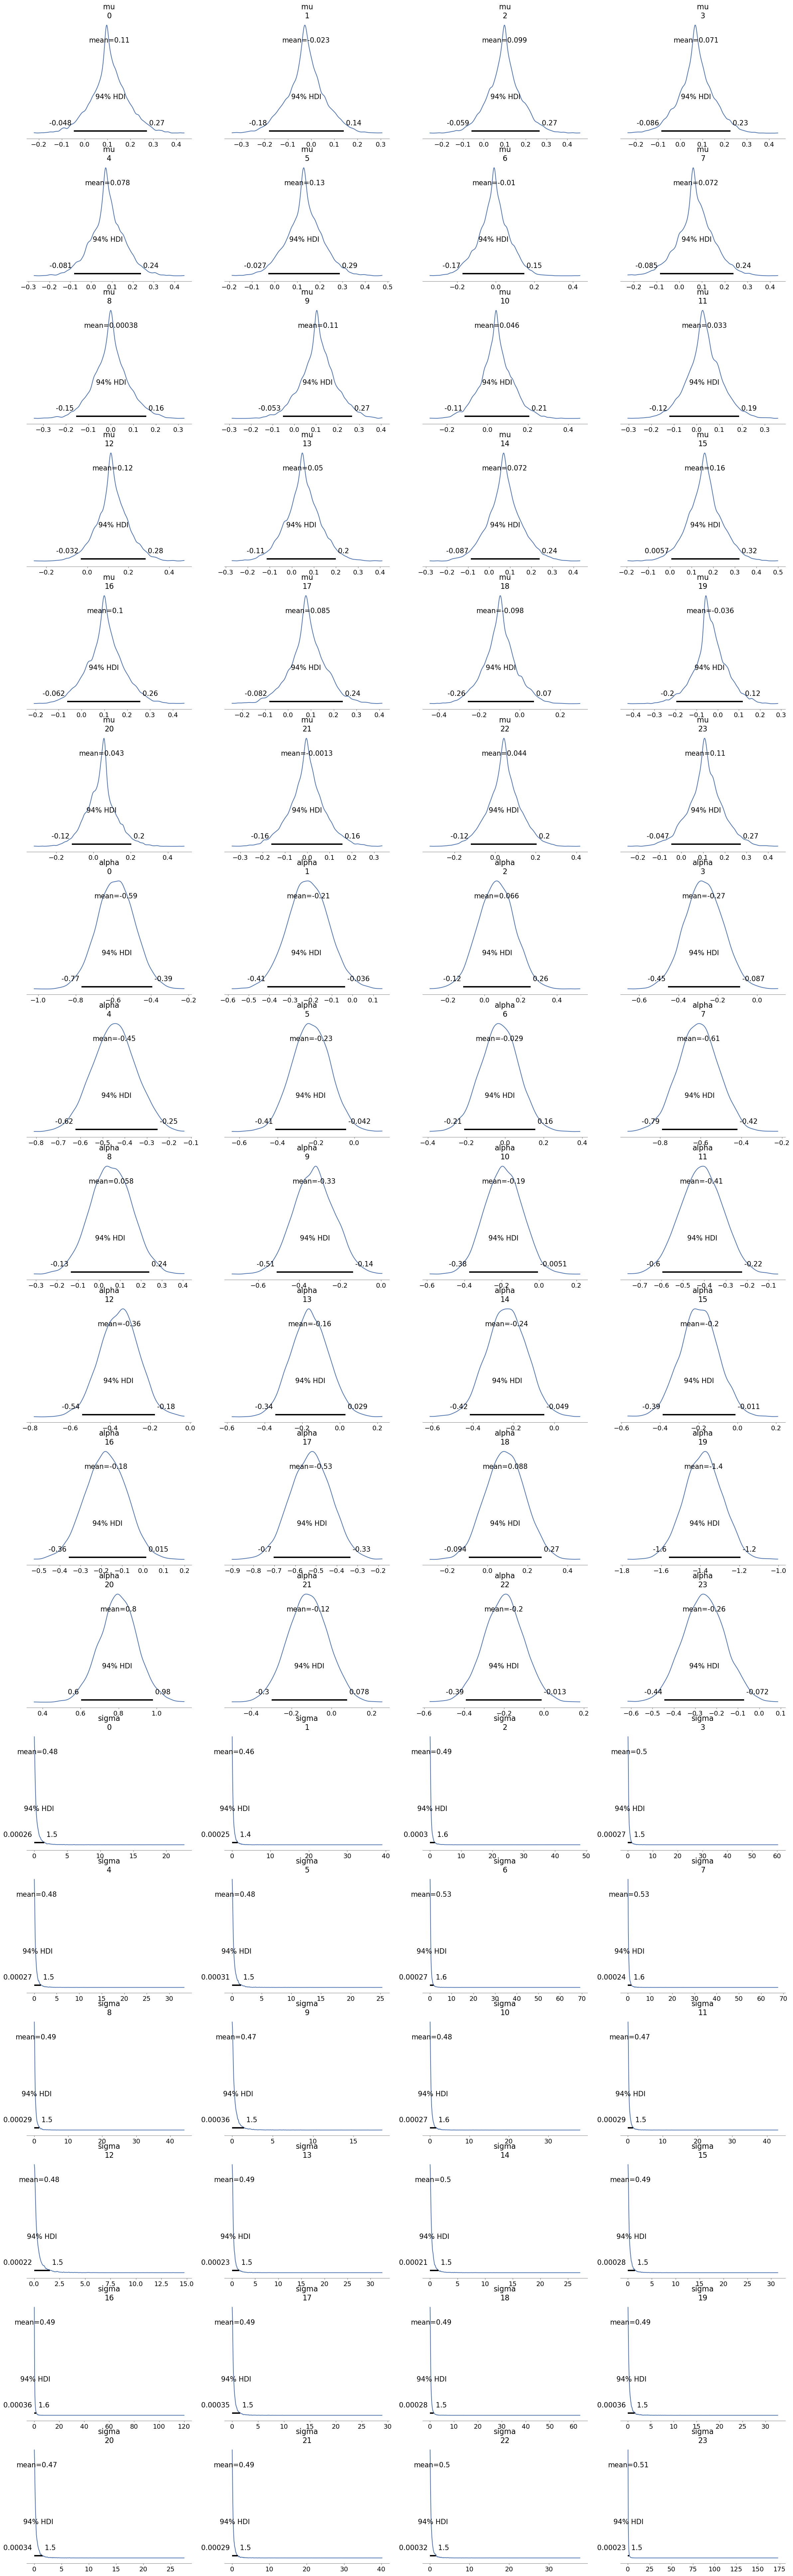

In [48]:
# pm.gelman_rubin(trace)
# pm.plot_divergence(trace)
# pm.autocorrplot(trace)
# pm.pairplot(trace, var_names=['parameter1', 'parameter2'])
# pm.plot_posterior(trace, var_names=['parameter1', 'parameter2'])
# pm.rcParams['plot.max_subplots'] = len(trace.varnames)
# pm.plot_posterior(trace)
import arviz as az
import matplotlib.pyplot as plt

# Gelman-Rubin Statistic
gelman_rubin_statistic = az.rhat(trace)
print("Gelman-Rubin Statistic:")
print(gelman_rubin_statistic)

# Divergence Plot
# az.plot_divergence(trace)
# plt.show()

# Autocorrelation Plots
az.plot_autocorr(trace)
plt.show()

# Pair Plots
# az.plot_pair(trace, var_names=['parameter1', 'parameter2'])
# plt.show()

# Posterior Distribution Plots
# az.plot_posterior(trace, var_names=['parameter1', 'parameter2'])
# plt.show()

summary = az.summary(trace)
# print(summary.index.to_list())

# Setting maximum subplots to the number of variables
az.rcParams["plot.max_subplots"] = len(summary)

# Posterior Distribution Plots (with updated max_subplots)
az.plot_posterior(trace)
plt.show()


In [50]:
print(summary.index.to_list())

['mu[0]', 'mu[1]', 'mu[2]', 'mu[3]', 'mu[4]', 'mu[5]', 'mu[6]', 'mu[7]', 'mu[8]', 'mu[9]', 'mu[10]', 'mu[11]', 'mu[12]', 'mu[13]', 'mu[14]', 'mu[15]', 'mu[16]', 'mu[17]', 'mu[18]', 'mu[19]', 'mu[20]', 'mu[21]', 'mu[22]', 'mu[23]', 'alpha[0]', 'alpha[1]', 'alpha[2]', 'alpha[3]', 'alpha[4]', 'alpha[5]', 'alpha[6]', 'alpha[7]', 'alpha[8]', 'alpha[9]', 'alpha[10]', 'alpha[11]', 'alpha[12]', 'alpha[13]', 'alpha[14]', 'alpha[15]', 'alpha[16]', 'alpha[17]', 'alpha[18]', 'alpha[19]', 'alpha[20]', 'alpha[21]', 'alpha[22]', 'alpha[23]', 'sigma[0]', 'sigma[1]', 'sigma[2]', 'sigma[3]', 'sigma[4]', 'sigma[5]', 'sigma[6]', 'sigma[7]', 'sigma[8]', 'sigma[9]', 'sigma[10]', 'sigma[11]', 'sigma[12]', 'sigma[13]', 'sigma[14]', 'sigma[15]', 'sigma[16]', 'sigma[17]', 'sigma[18]', 'sigma[19]', 'sigma[20]', 'sigma[21]', 'sigma[22]', 'sigma[23]']


In [ ]:
# Pair Plots
az.plot_pair(trace, var_names=['alpha'])
plt.show()

In [3]:
print(posterior_mean_returns)

NameError: name 'posterior_mean_returns' is not defined